# 목표 : 당뇨병 환자의 1년 후 병의 진전된 정도를 예측하는 모델을 만들어보자!

### 1. 사이킷런에서 당뇨병 환자 데이터 가져오기

(1) load_diabetes() 함수로 당뇨병 데이터 준비하기
- sklearn에서는 여러 토이 데이터를 제공합니다.
- 그 중 당뇨데이터셋을 불러오겠습니다.
- load_데이터명() 함수로 해당 데이터를 Bunch 클래스로 불러올 수 있습니다.
- Bunch 클래스는 파이썬 딕셔너리처럼 키-값 쌍을 가지는 클래스로 특별한 기능은 없습니다.
- data, target 키와 데이터 값을 가진 arrya 값 쌍으로 이루어져 있습니다.
- 그 외의 다양한 메타 데이터를 갖습니다.

In [9]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()
diabetes

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

(2)해당 array 데이터는 넘파이의 배열로 저장되어 있기 때문에 shape 메소드로 해당 데이터의 크기를 확인해볼 수 있습니다.
- shape 메소드
    - https://github.com/numpy/numpy/blob/main/numpy/core/src/multiarray/shape.c
    - https://github.com/numpy/numpy/blob/main/numpy/core/shape_base.py
    - array 각각 차원의 크기를 반환해줍니다.
<br><br> 
- diabetes data shape 결과를 보면, data는 2차원 데이터, target은 1차원 데이터로 되어있음을 볼 수 있다.
    - 먼저 data는 442개의 행과 10개의 열로 이루어져 있다.
        - 이는 10개의 특성을 가진 442개의 샘플이 있다, 라고 말할 수 있다.
        - 각각의 샘플은 10개의 특성을 모두 가지고 있는 데이터 집합이다.
    - target은 하나의 값으로 되어있고, 이들 하나하나는 data의 각 샘플과 대응된다.
    - 우리가 할 일은 입력 데이터(data)와 타겟 데이터(target) 사이의 규칙을 찾아내는 것이고, 이 규칙을 "모델" 이라고 한다.

In [10]:
print(diabetes.data.shape, diabetes.target.shape)

(442, 10) (442,)


In [11]:
diabetes.data[0:3]

array([[ 0.03807591,  0.05068012,  0.06169621,  0.02187239, -0.0442235 ,
        -0.03482076, -0.04340085, -0.00259226,  0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, -0.02632753, -0.00844872,
        -0.01916334,  0.07441156, -0.03949338, -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, -0.00567042, -0.04559945,
        -0.03419447, -0.03235593, -0.00259226,  0.00286131, -0.02593034]])

In [12]:
diabetes.target[0:3]

array([151.,  75., 141.])

(3) 당뇨병 환자 데이터 시각화하기
- 위에서 본 데이터와 타겟 간의 관련성을 보기 위해 시각화를 해보겠습니다.
- 데이터의 모든 특성과 타겟 사이의 연관성을 한번에 보기는 쉽지 않습니다. 각 샘플당 특성이 10개나 되기 때문에 11차원 그래프가 필요하기 때문입니다.
- 따라서 하나의 특성과 타겟 사이의 연관도를 2차원 그래프인 산점도를 통해서 살펴보도록 하겠습니다.

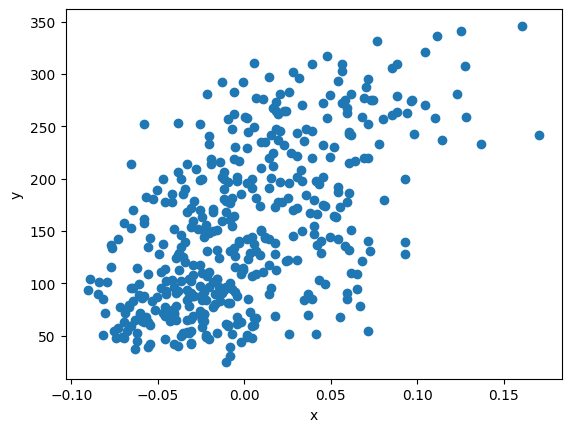

In [14]:
import matplotlib.pyplot as plt

plt.scatter(diabetes.data[:, 2], diabetes.target)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

(4) 학습 데이터 준비하기

위의 그래프의 x축은 diabetes.data의 세번쨰 특성이고, y축은 diabetes.target 입니다. 육안으로 보아도 두 값 사이의 정비례 관계를 확인할 수 있습니다.
<br>이 x와 y의 값을 훈련 데이터로 사용할 수 있도록 해보겠습니다.

In [15]:
x = diabetes.data[:, 2]
y = diabetes.target

### 2. 경사하강법으로 모델 학습하기

(1) 예측 값을 이용하여 모델 학습하기
- 입력과 출력 데이터를 이용하여 발견된 새로운 규칙을 모델이라고 한다고 했습니다.
- 이 모델에 새로운 입력값을 넣었을때 나오는 값을 예측값이라고 합니다.
- 예측값은 타겟데이터를 표현하는 y와 구분하기 위해 y_hat이라고 합니다.
- 이 예측값을 실제값과 비슷하게 출력하는 모델의 가중치(기울기)와 상수(절편)를 찾아가며 모델을 조정할 수 있습니다.

그럼 무작위의 값으로부터 원하는 값을 찾아가보겠습니다.

In [16]:
w = 1.0
b = 1.0

임의로 넣은 값들로 한번 예측값을 구해보겠습니다.

In [22]:
y_hat = x[0] * w + b
print("y_hat:", y_hat, "\ty:", y[0])

y_hat: 1.0616962065186832 	y: 151.0


이런, 무작위 값을 넣어서 예측한 값은 실제 y값과 아주 차이가 많이 나네요.<br>
그렇다면 우리는 w와 b를 좀 더 좋은 방향으로 바꿔야 합니다.<br>
그런데 어떻게 바꿔야 더 좋은 예측값을 만들어 낼 수 있을까요?<br>
잘 모를 때는 일단 w룰 조금 바꿔서 예측값이 어떻게 변하는지 관찰해볼 수 있겠습니다.

In [23]:
w_inc = w + 0.1
y_hat_inc = x[0] * w_inc + b
print(y_hat_inc)

1.0678658271705517


w 가 1 일때보다 살짝 증가한 w_inc를 이용한 예상값을 보면 y_hat이 살짝 증가했음을 알 수 있네요. <br>
정확히 얼마나 증가했는지 증가율을 계산해보겠습니다. 증가율의 계산은 w의 증가 정도로 y의 증가 정도를 나누면 됩니다.

In [25]:
w_rate = (y_hat_inc - y_hat) / (w_inc - w)
print(w_rate)
print(x[0])

0.06169620651868429
0.061696206518683294


아하, w 대비 y 증가량은 다음과 같군요. 그런데 신기한 점은 이 값은 x[0]과 거의 같다는 점입니다. <br>
이 방법은 굉장히 번거롭습니다. 얼만큼 올려야할지 계산하기 쉽지 않고, 또 음수의 변화율을 가지게 되면 w는 감소되어야 합니다. 따라서 변화율의 양수/음수를 나누어 판단해야 하는 번거로움이 있습니다.<br>
이번에는 변화율 그 자체를 이용하여 이 귀찮은 문제를 해결해보겠습니다.

(2) 변화율로 가중치 업데이트 하기
- 변화율 자체를 이용하면 변화율이 0보다 크거나 작거나 상관없이, 더하는 방식으로 업데이트 할 수 있습니다.
    - 변화율이 양수인경우(우상향 그래프), w가 증가하면 예측값이 증가하는데, w를 증가시키기 위해 양수인 변화율을 더할 수 있다.
    - 변화율이 음수인경우(우하향 그래프), w가 감소하면 예측값이 증가하는데, w를 감소시키기 위해 음수인 변화율을 더할 수 있다.

In [28]:
w_new = w + w_rate
print(w_new)

1.0616962065186843


(3) 변화율로 절편 업데이트 하기
- 이번에는 가중치가 아닌 절편을 업데이트 해보겠습니다.
- 마찬가지로 절편의 변화율을 구한 뒤 변화율로 절편을 업데이트 해볼게요.

In [29]:
b_inc = b + 0.1
y_hat_inc = x[0] * w + b_inc
print(y_hat_inc)

1.1616962065186833


In [31]:
b_rate = (y_hat_inc - y_hat) / (b_inc - b)
print(b_rate)

1.0


변화율의 값이 1이 나왔습니다. 즉, b를 업데이트 하기 위해서는 변화율인 1을 b에 더하면 되겠군요.}

In [32]:
b_new = b + 1
print(b_new)

2.0


(4) 오차 역전파로 가중치와 절편 업데이트 하기
- 위의 방법은 사실 별로 적절하지 않습니다. 왜냐면 w, b의 수정을 큰 폭으로 하기 어렵고 또 특정 값을 정하기 쉽지 않습니다.
- 또 더하는 방식으로 모델을 수정하기 때문에 만약 예측값이 y보다 커지면 예측값을 감소시킬 방법이 없습니다.
- 따라서 더욱 적절하게 업데이트 할 수 있는 방법인 오차 역전파를 배워보도록 합시다.
- 오차 역전파는 예측값과 실제 y값의 차이인 오차의 양을 변화율에 곱하는 방법으로 업데이트 하는 방식입니다.

먼저 w = 1.0, b = 1.0의 값일때 나온 y_hat과 y[0]을 이용하여 오차를 구하고, 변화율에 오차를 곱해서 가중치와 절편을 업데이트 해봅시다.

In [37]:
err = y[0] - y_hat
w_new = w + w_rate * err
b_new = b + b_rate * err
print("w 업데이트:", w, "->", w_new, "\tb 업데이트:", b, "->", b_new)

w 업데이트: 1.0 -> 10.250624555903848 	b 업데이트: 1.0 -> 150.9383037934813


와우, 한번에 정말 많이 업데이트가 되었네요.<br>
이번에는 x[1]을 이용하여 만들어진 y_hat과 y[1] 사이의 오차로 가중치와 절편을 업데이트 해보겠습니다.

In [38]:
y_hat = x[1] * w_new + b_new
err = y[1] - y_hat

w_rate = x[1]
w_new = w_new + w_rate * err

b_new = b_new + 1 * err
print(w_new, b_new)

14.132317616380695 75.52764127612656


두번째 샘플을 넣었더니 모델의 가중치와 절편이 다시 변했네요. 이렇게 전체 데이터에 대해 가장 적절한 모델을 찾아가는 과정을 진행해봅시다. 

In [39]:
for x_i, y_i in zip(x, y):
    y_hat = x_i * w + b
    err = y_i - y_hat
    w_rate = x_i
    w = w + w_rate * err
    b = b + 1 * err

print(w, b)

587.8654539985616 99.4093556453094


위의 가중치와 절편이 전체 데이터세트를 잘 대표하는 모델인지 확인해보죠.
- 시작점과 끝점을 각각 구해서 선을 그려봅시다.
- plot([[x1, y1], [x2, y2]])

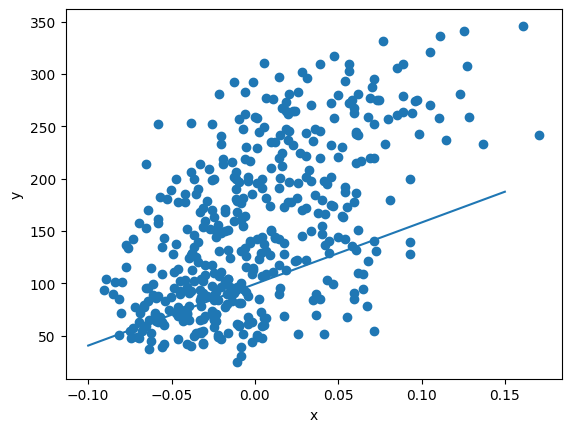

In [40]:
plt.scatter(x, y)
pt1 = (-0.1, -0.1 * w + b)
pt2 = (0.15, 0.15 * w + b)
plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]])
plt.xlabel("x")
plt.ylabel("y")
plt.show()

어느정도는 산점도를 표현하고 있지만, 아주 만족스럽지는 않네요.<br>
보통의 경사하강법에서는 주어진 전체 훈련데이터로 학습을 여러번 반복합니다. 이때 한 단위의 작업을 에포크라고 표현합니다.<br>
100번의 에포크를 반복 한 뒤 결과를 확인해봅시다.

In [41]:
for i in range(1, 100):
    for x_i, y_i in zip(x, y):
        y_hat = x_i * w + b
        err = y_i - y_hat
        w_rate = x_i
        w = w + w_rate * err
        b = b + 1 * err

print(w, b)

913.5973364346786 123.39414383177173


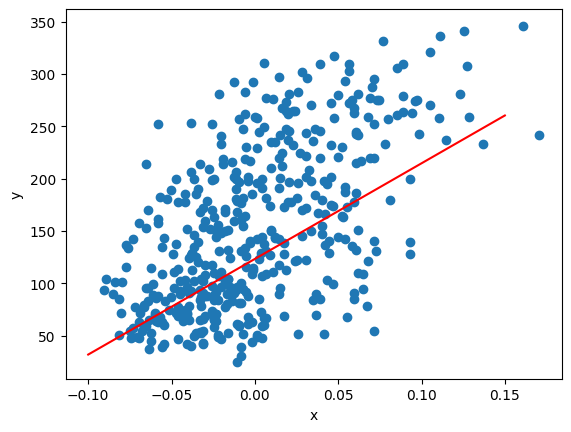

In [46]:
plt.scatter(x, y)
pt1 = (-0.1, -0.1 * w + b)
pt2 = (0.15, 0.15 * w + b)
plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]], "r")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

(5) 모델로 예측하기
- 그럼 위에서 만들어진 모델로 새로운 값이 들어왔을때의 예측값을 찾아봅시다.

In [47]:
x_new = 0.18
y_pred = x_new * w + b
print(y_pred)

287.8416643900139


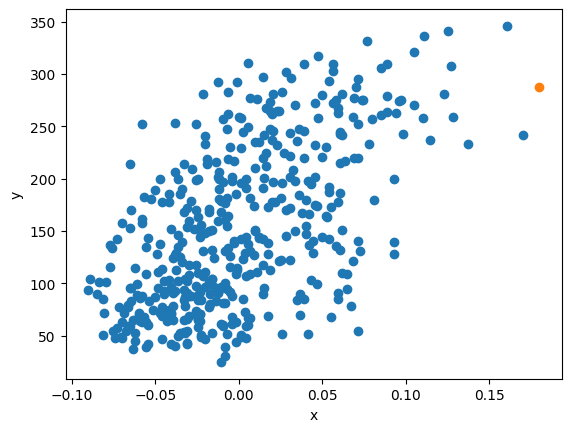

In [48]:
plt.scatter(x, y)
plt.scatter(x_new, y_pred)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

### 3. 손실함수와 경사하강법
경사하강법은 정의된 손실함수의 값이 최소가 되는 지점을 찾아가는 방법으로 이때, 손실함수는 예상한 값과 실제 타깃값의 차이를 함수로 정의한 것을 말합니다.<br>
이번에는 손실함수 중 하나인 제곱 오차를 이용해봅시다.<br>
제곱오차는 말 그대로 타깃값과 예측값을 뺀 다음 이을 제곱한 값을 말합니다.<br>
이런 제곱오차 함수의 최솟값을 알아내려면 기울기에 따라 함수의 값이 작아지는 방향으로 이동해야 합니다.<br>
그렇다면 기울기는 어떻게 구할까요? 바로 제곱오차를 가중치나 절편에 대해 미분을 하면 됩니다. 
* 가중치에 대해 제곱오차를 편미분하기
    * -(y - y_hat)*x
    * 가중치 업데이트 = w + (y-y_hat)*x
* 절편에 대해 제곱오차를 편미분하기
    * -(y - y_hat)
    * 절편 업데이트 = b + (y-y_hat)

### 4. 선형 회귀를 위한 뉴런 만들기
앞에서 만든 경사하강법 알고리즘을 Neuron이라는 파이썬 클래스로 만들어 봅시다.

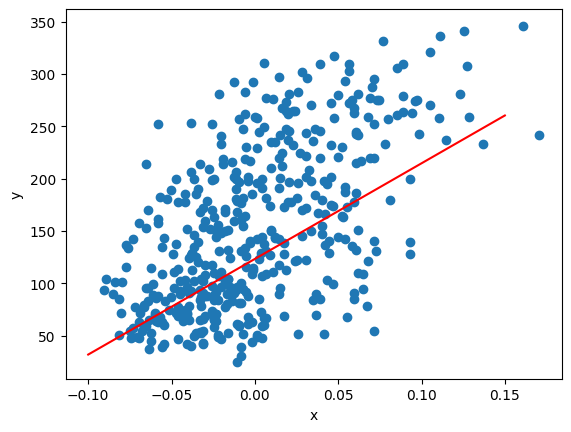

In [50]:
class Neuron:
    def __init__(self):
        self.w = 1.0
        self.b = 1.0
    
    def forpass(self, x):
        y_hat = x * self.w + self.b
        return y_hat
    
    def backdrop(self, x, err):
        w_grad = x * err
        b_grad = 1 * err
        return w_grad, b_grad

    def fit(self, x, y, epochs=100):
        for i in range(epochs):
            for x_i, y_i in zip(x, y):
                y_hat = self.forpass(x_i)
                err = -(y_i - y_hat)
                w_grad, b_grad = self.backdrop(x_i, err)
                self.w -= w_grad
                self.b -= b_grad


neuron = Neuron()
neuron.fit(x, y)

plt.scatter(x, y)
pt1 = (-0.1, -0.1*neuron.w+neuron.b)
pt2 = (0.15, 0.15*neuron.w+neuron.b)
plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]],"r")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

자, 당뇨병 환자의 데이터로 당뇨의 진전 정도를 예측할 수 있게 되었습니다!